In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

font = {'size'   : 22}
plt.rc('font', **font)

In [5]:
# These are our constants, don't touch
N = 100  # Number of variables (longitudes)
t = np.arange(0.0, 19.2, 0.01) # a timestep of 0.01 = 30 mins; a total of 1920 timesteps = 40 days
timeindays = t/2/24*100

def L96(x, t):
    """Lorenz 96 model with constant forcing"""
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d

Text

# Part a)

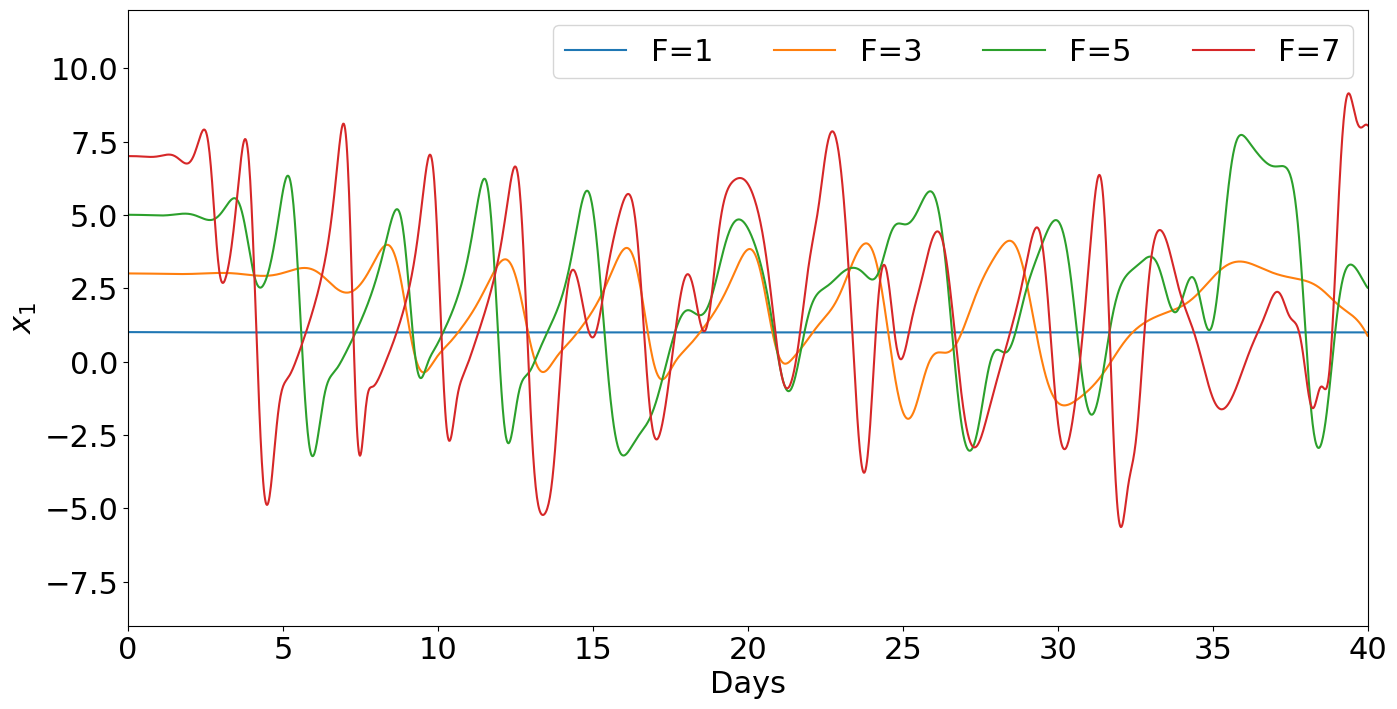

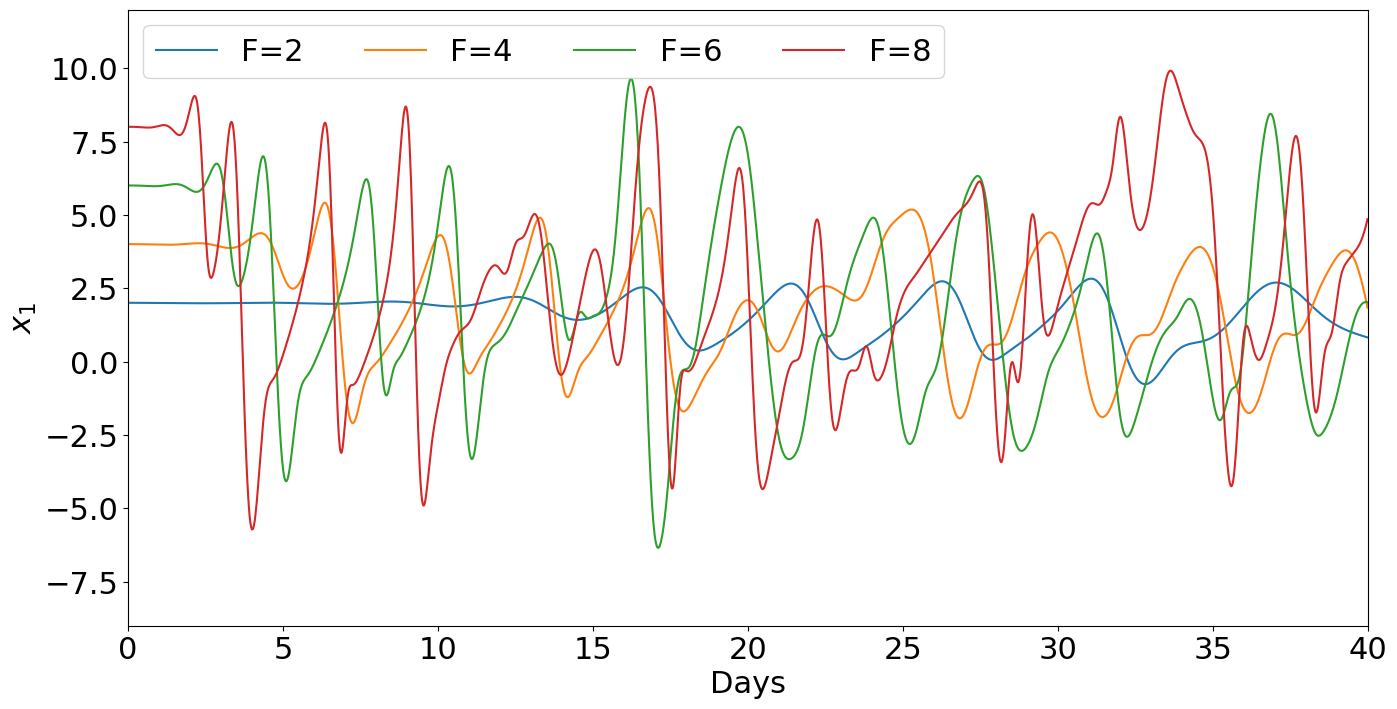

In [3]:
# solve the Lorenz equation using different values of F
F_options = [1,3,5,7]  # Forcing (modify this for part A)

fig, ax = plt.subplots(1,1, figsize = (16,8))

for F in F_options: 
    x0 = F * np.ones(N)  # Initial state (equilibrium)
    x0[0] += 0.01  # Add small perturbation to the first longitude
    x0_truth = odeint(L96, x0, t) # Take this solution to be the true evolution of the equation (array of values at the N different longitudes)

    
    ax.plot(timeindays, x0_truth[:, 0], label=f"F={F}")
    
    
ax.set_ylabel("$x_1$",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.ylim((-9,12))
plt.xlim((0,40))
plt.legend(ncol=4)
plt.show()

F_options = [2,4,6,8]  # Forcing (modify this for part A)

fig, ax = plt.subplots(1,1, figsize = (16,8))

for F in F_options: 
    x0 = F * np.ones(N)  # Initial state (equilibrium)
    x0[0] += 0.01  # Add small perturbation to the first longitude
    x0_truth = odeint(L96, x0, t) # Take this solution to be the true evolution of the equation (array of values at the N different longitudes)

    
    ax.plot(timeindays, x0_truth[:, 0], label=f"F={F}")
    
    
ax.set_ylabel("$x_1$",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.ylim((-9,12))
plt.xlim((0,40))
plt.legend(ncol=4)
plt.show()



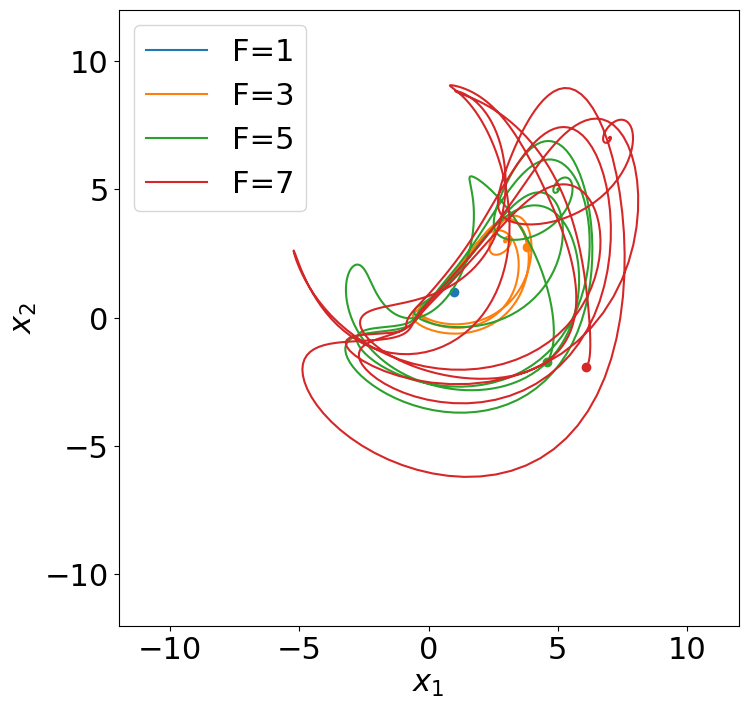

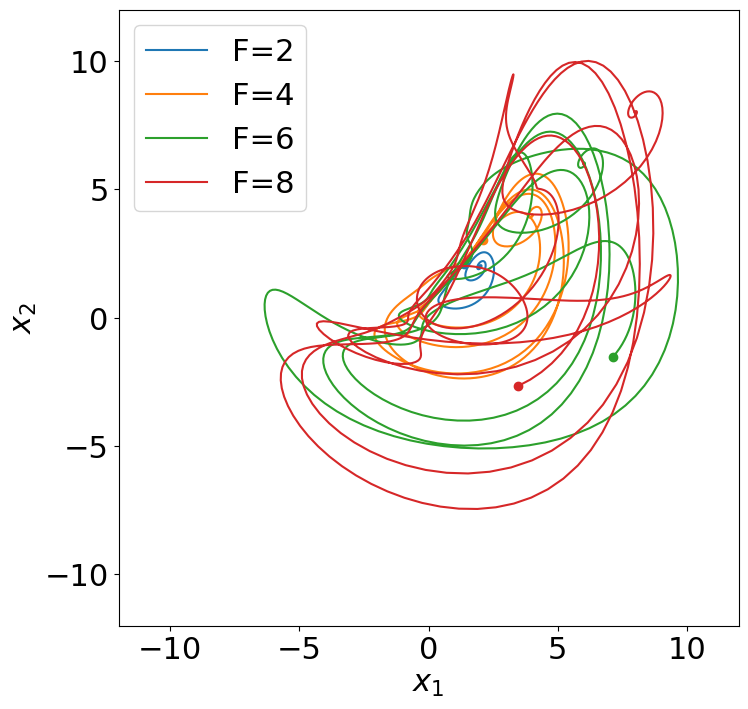

In [4]:
# solve the Lorenz equation using different values of F
F_options = [1,3,5,7]  # Forcing (modify this for part A)

day = 20
timeperiod = day*2*24
fig, ax = plt.subplots(1,1, figsize = (8,8))

for F in F_options: 
    x0 = F * np.ones(N)  # Initial state (equilibrium)
    x0[0] += 0.01  # Add small perturbation to the first longitude
    x0_truth = odeint(L96, x0, t) # Take this solution to be the true evolution of the equation (array of values at the N different longitudes)

    
    ax.plot(x0_truth[0:timeperiod, 0], x0_truth[0:timeperiod, 1],label=f"F={F}")
    ax.scatter(x0_truth[timeperiod-1, 0], x0_truth[timeperiod-1, 1])
    

ax.set_xlabel("$x_1$",fontsize=22)
ax.set_ylabel("$x_2$",fontsize=22)
plt.ylim((-12,12))
plt.xlim((-12,12))
plt.legend(ncol=1)
plt.show()


F_options = [2,4,6,8]  # Forcing (modify this for part A)

day = 20
timeperiod = day*2*24
fig, ax = plt.subplots(1,1, figsize = (8,8))

for F in F_options: 
    x0 = F * np.ones(N)  # Initial state (equilibrium)
    x0[0] += 0.01  # Add small perturbation to the first longitude
    x0_truth = odeint(L96, x0, t) # Take this solution to be the true evolution of the equation (array of values at the N different longitudes)

    
    ax.plot(x0_truth[0:timeperiod, 0], x0_truth[0:timeperiod, 1],label=f"F={F}")
    ax.scatter(x0_truth[timeperiod-1, 0], x0_truth[timeperiod-1, 1])
    

ax.set_xlabel("$x_1$",fontsize=22)
ax.set_ylabel("$x_2$",fontsize=22)
plt.ylim((-12,12))
plt.xlim((-12,12))
plt.legend(ncol=1)
plt.show()

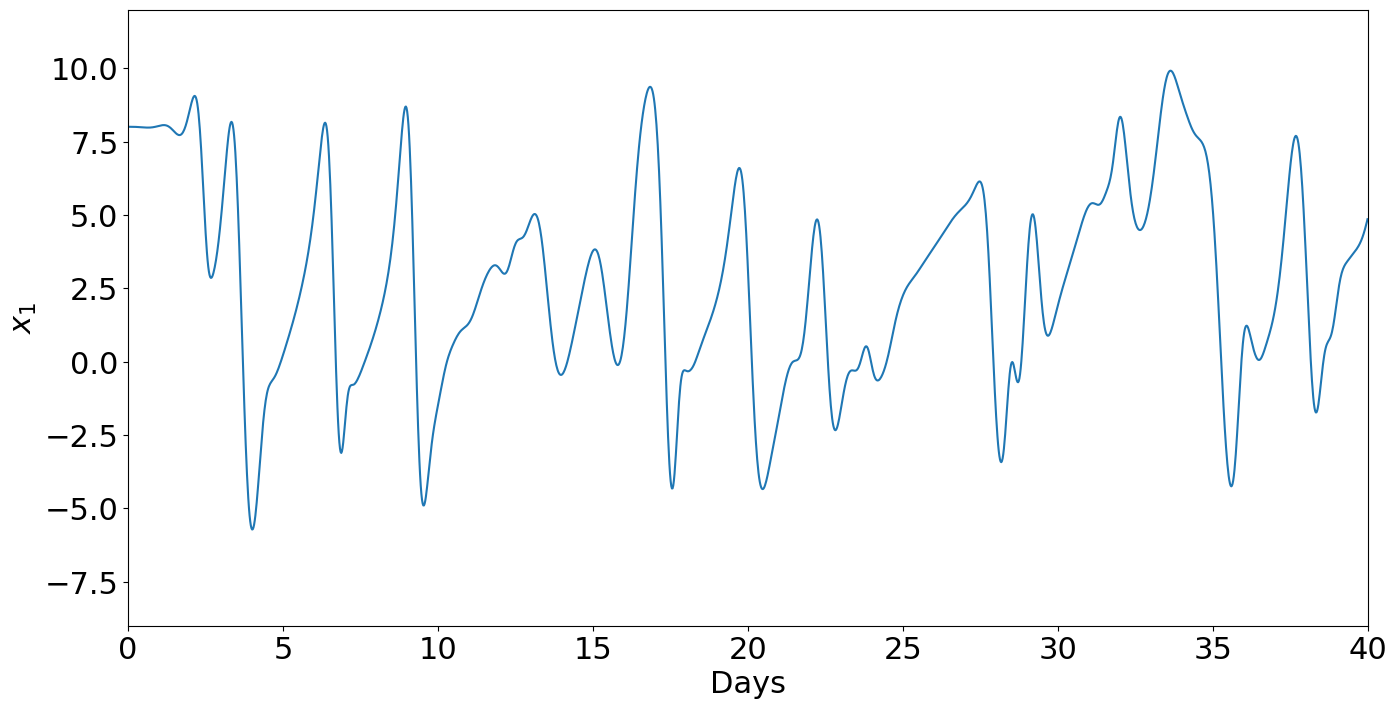

In [5]:
# Plot x values for the first longitude over time
fig, ax = plt.subplots(1,1, figsize = (16,8))
ax.plot(timeindays, x0_truth[:, 0])
ax.set_ylabel("$x_1$",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.ylim((-9,12))
plt.xlim((0,40))
plt.show()

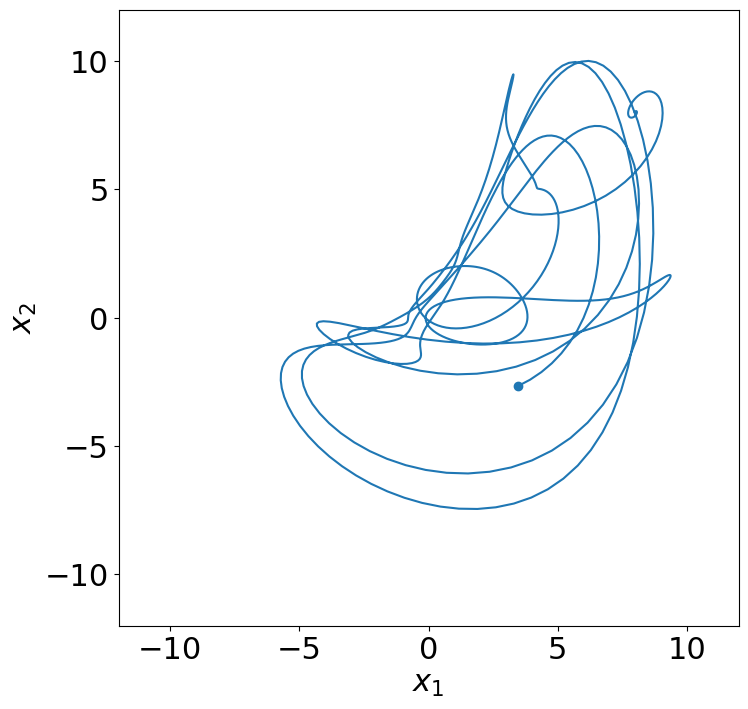

In [6]:
# Plot x values for first two longitudes against each other
day = 20
timeperiod = day*2*24
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.plot(x0_truth[0:timeperiod, 0], x0_truth[0:timeperiod, 1])
ax.scatter(x0_truth[timeperiod-1, 0], x0_truth[timeperiod-1, 1])
ax.set_xlabel("$x_1$",fontsize=22)
ax.set_ylabel("$x_2$",fontsize=22)
plt.ylim((-12,12))
plt.xlim((-12,12))
plt.show()

# Part b)

0.1 : 1.625


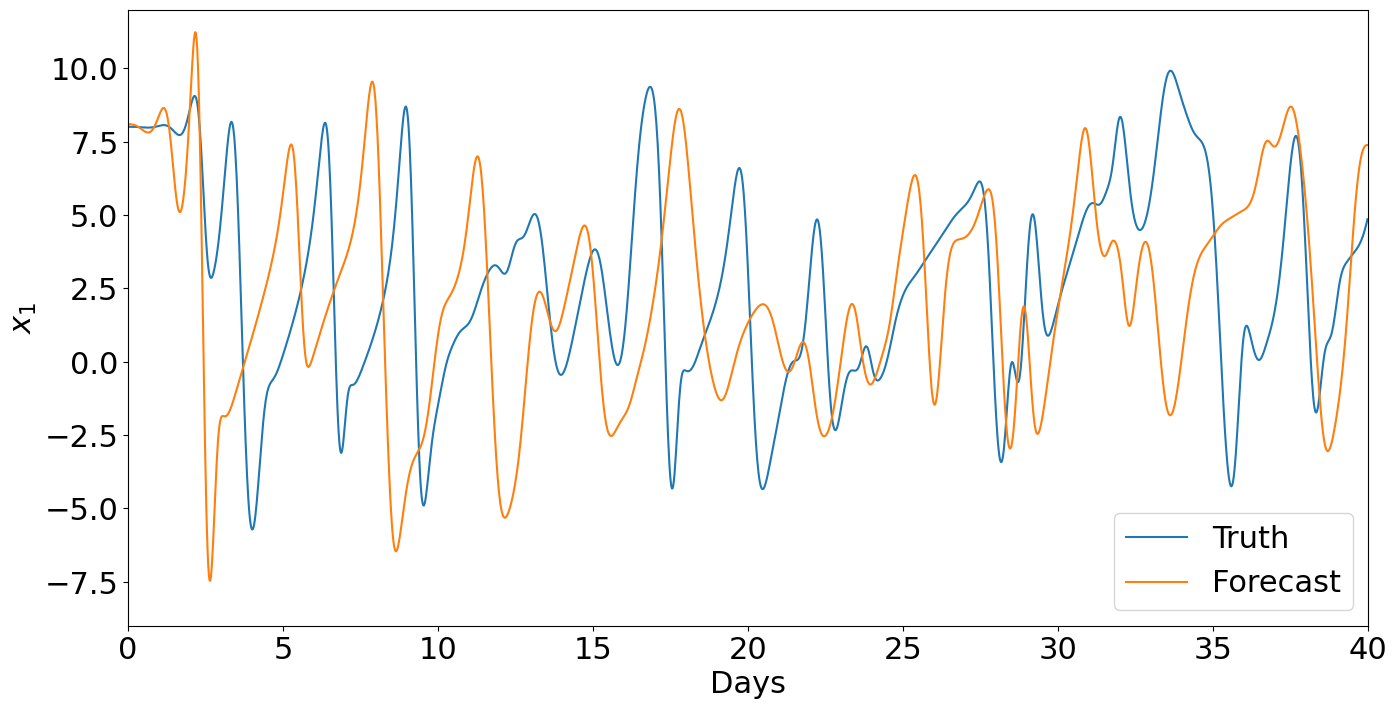

0.02 : 2.4166666666666665


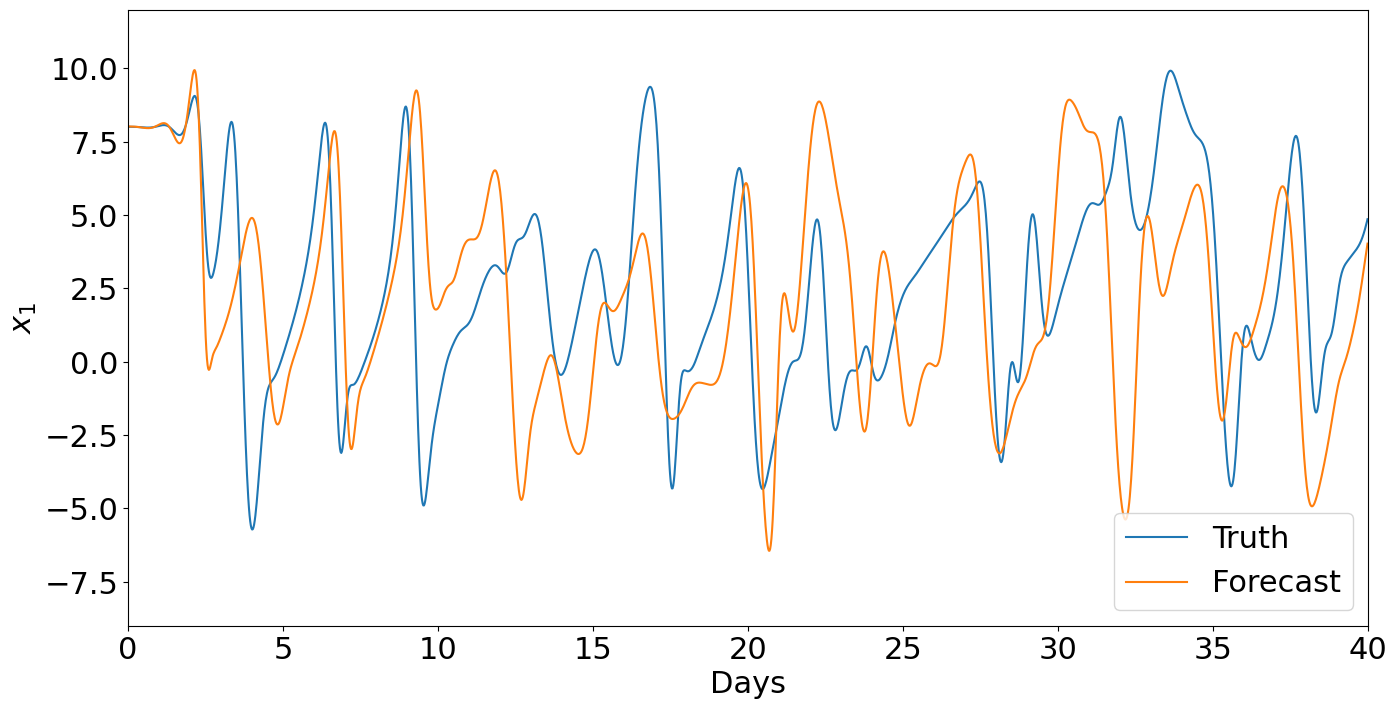

0.011 : 9.250000000000002


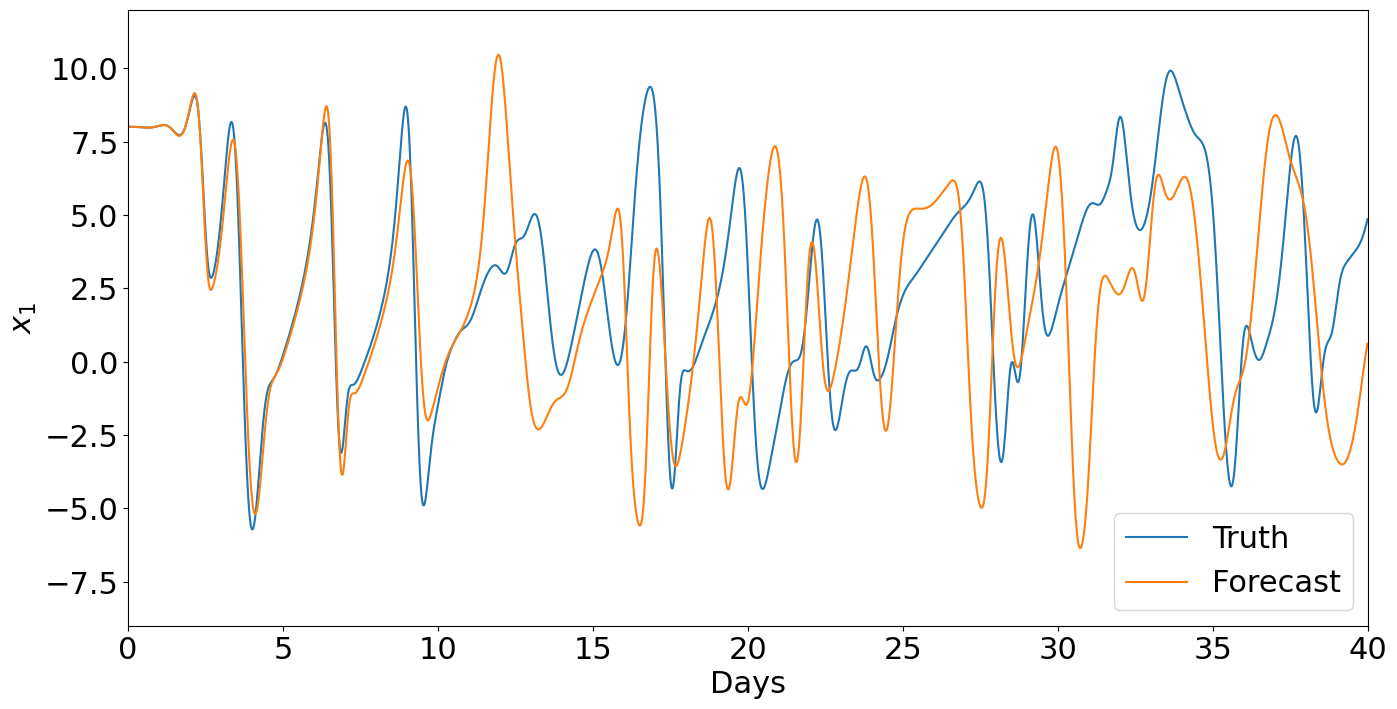

In [7]:
# solve the Lorenz equation twice with different sizes of perturbations
F = 8  # Forcing (leave as F = 8 for part B)

perturbations = [0.1, 0.02, 0.011]

for pert in perturbations:

    x0 = F * np.ones(N)  # Initial state (equilibrium)
    x0[0] += 0.01  # Add small perturbation to the first longitude
    x0_truth = odeint(L96, x0, t) # Take this solution to be the true evolution of the equation (array of values at the N different longitudes)

    x0 = F * np.ones(N)  # Initial state (equilibrium)
    x0[0] += pert  # Add a slightly larger perturbation to the first longitude (Modify this for part B)
    x0_forecast = odeint(L96, x0, t) # Take this solution to be your forecast of the evolution of the equation with imperfect initialization (array of values at the N different longitudes)

    # find where forecase is at least 2.5 away from the truth
    diff = abs(x0_truth[:,0] - x0_forecast[:,0])
    print(pert, ":", timeindays[np.where(diff >= 2.5)[0][0]])

    # make our silly little graphs
    # Plot x values for the first lomgitude over time for two different initial conditions
    legend = ['Truth', 'Forecast']
    fig, ax = plt.subplots(1,1, figsize = (16,8))
    ax.plot(timeindays, x0_truth[:, 0])
    ax.plot(timeindays, x0_forecast[:, 0])
    ax.set_ylabel("$x_1$",fontsize=22)
    ax.set_xlabel("Days",fontsize=22)
    plt.ylim((-9,12))
    plt.xlim((0,40))
    ax.legend(legend)
    plt.show()


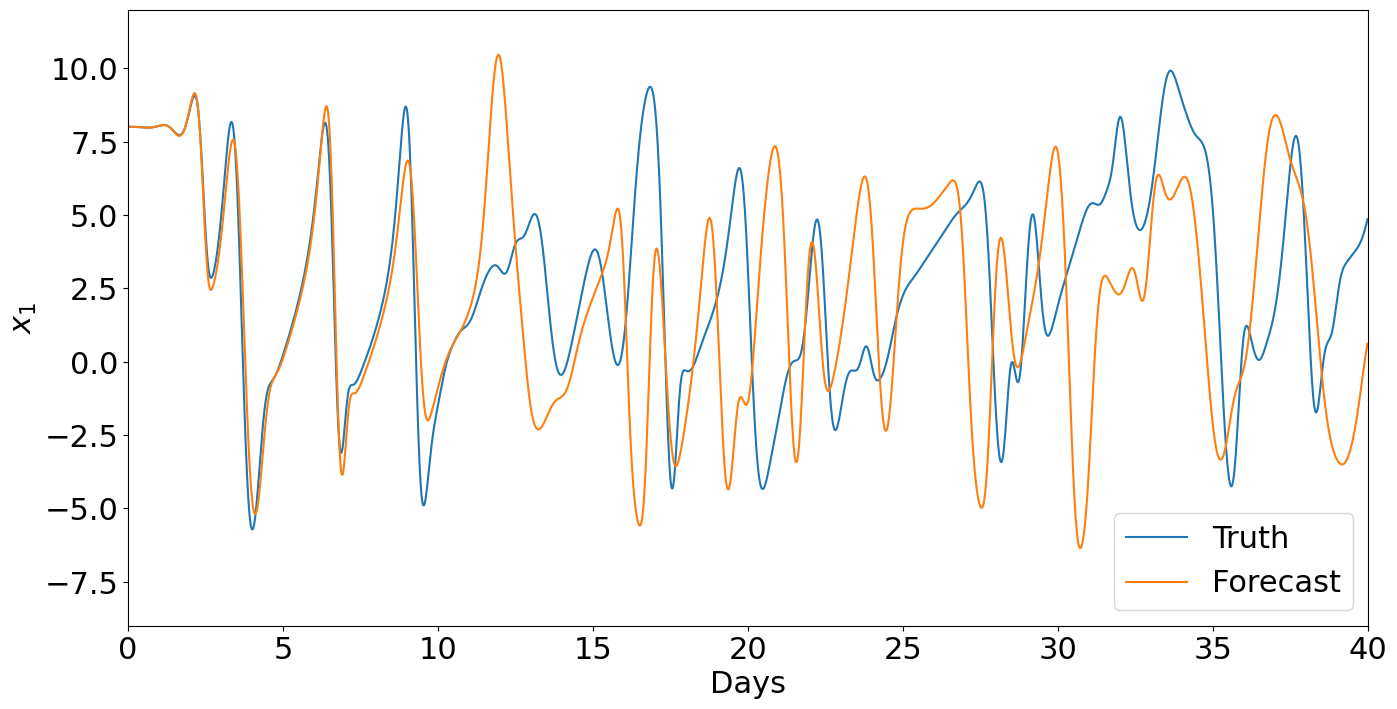

In [8]:
# Plot x values for the first lomgitude over time for two different initial conditions
legend = ['Truth', 'Forecast']
fig, ax = plt.subplots(1,1, figsize = (16,8))
ax.plot(timeindays, x0_truth[:, 0])
ax.plot(timeindays, x0_forecast[:, 0])
ax.set_ylabel("$x_1$",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.ylim((-9,12))
plt.xlim((0,40))
ax.legend(legend)
plt.show()

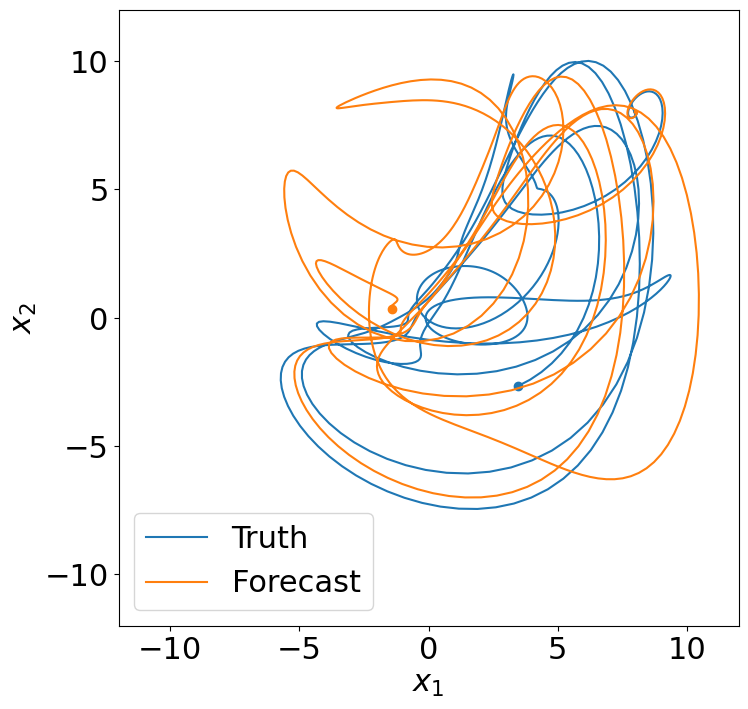

In [9]:
# Plot the first two variables against each other for two different initial conditions
day = 20
timeperiod = day*2*24
legend = ['Truth', 'Forecast']
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.plot(x0_truth[0:timeperiod, 0], x0_truth[0:timeperiod, 1])
ax.plot(x0_forecast[0:timeperiod, 0], x0_forecast[0:timeperiod, 1])
ax.scatter(x0_truth[timeperiod-1, 0], x0_truth[timeperiod-1, 1])
ax.scatter(x0_forecast[timeperiod-1, 0], x0_forecast[timeperiod-1, 1])
ax.set_xlabel("$x_1$",fontsize=22)
ax.set_ylabel("$x_2$",fontsize=22)
plt.ylim((-12,12))
plt.xlim((-12,12))
ax.legend(legend)
plt.show()

# Part c)

In [13]:
#generate ensemble of initial conditions
F = 8  # Forcing (leave as F = 8 for part C)

x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable
x0_init = odeint(L96, x0, t)

ensemble = 250 # number of ensemble members to generate

mu, sigma = 0, 0.1 # mean and standard deviation (modify sigma for part C)
s = np.random.normal(mu, sigma, ensemble)

xj = np.zeros(shape=(ensemble,len(t),N))

for j in range(ensemble):
    x0 = x0_init[1000,:] # New initial state (steady state from above after 1000 timesteps when saturation has been reached)
    x0[0] += s[j]  # Add small perturbation to the first longitude, draw from Gaussian error s
    x = odeint(L96, x0, t)
    xj[j,:]=x

KeyboardInterrupt: 

In [11]:
variancex = np.zeros(shape=(N,len(t)))
for l in range(N):
    for k in range(len(t)):
        variancex[l,k] = np.var(xj[:,k,l])

(1920,)
(1919,)
[]


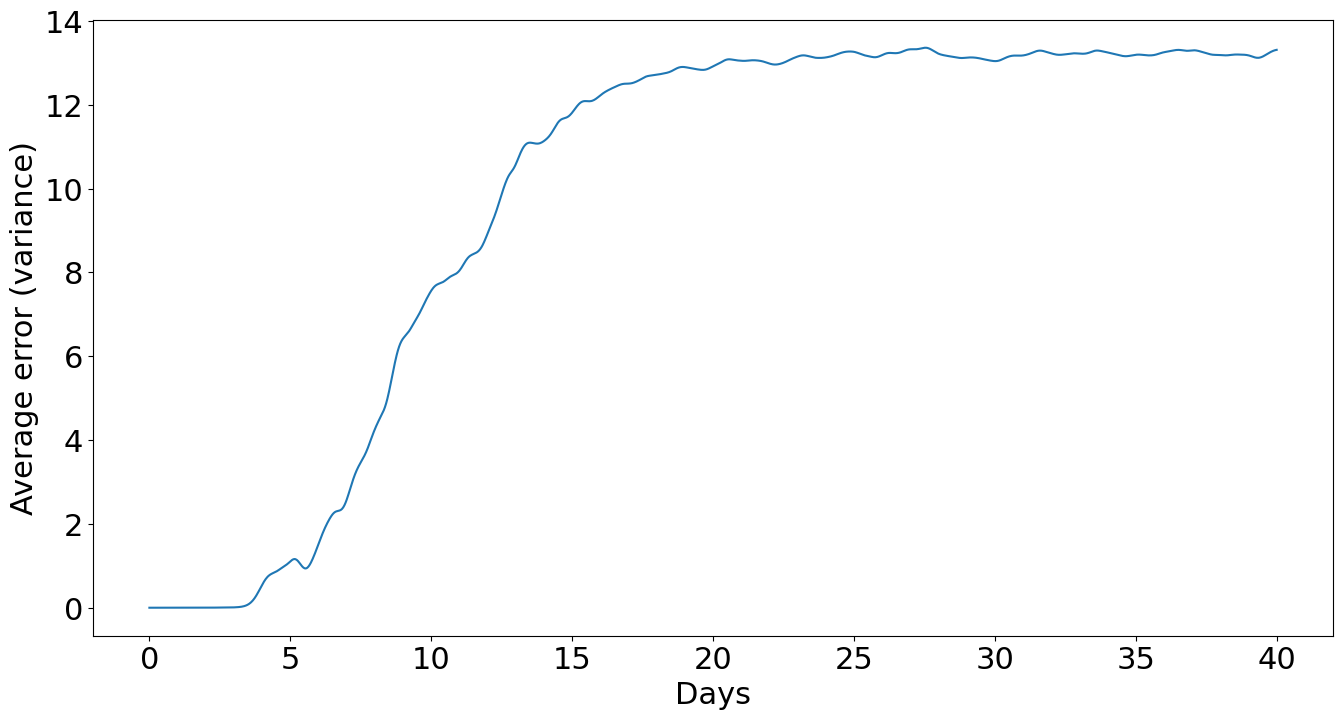

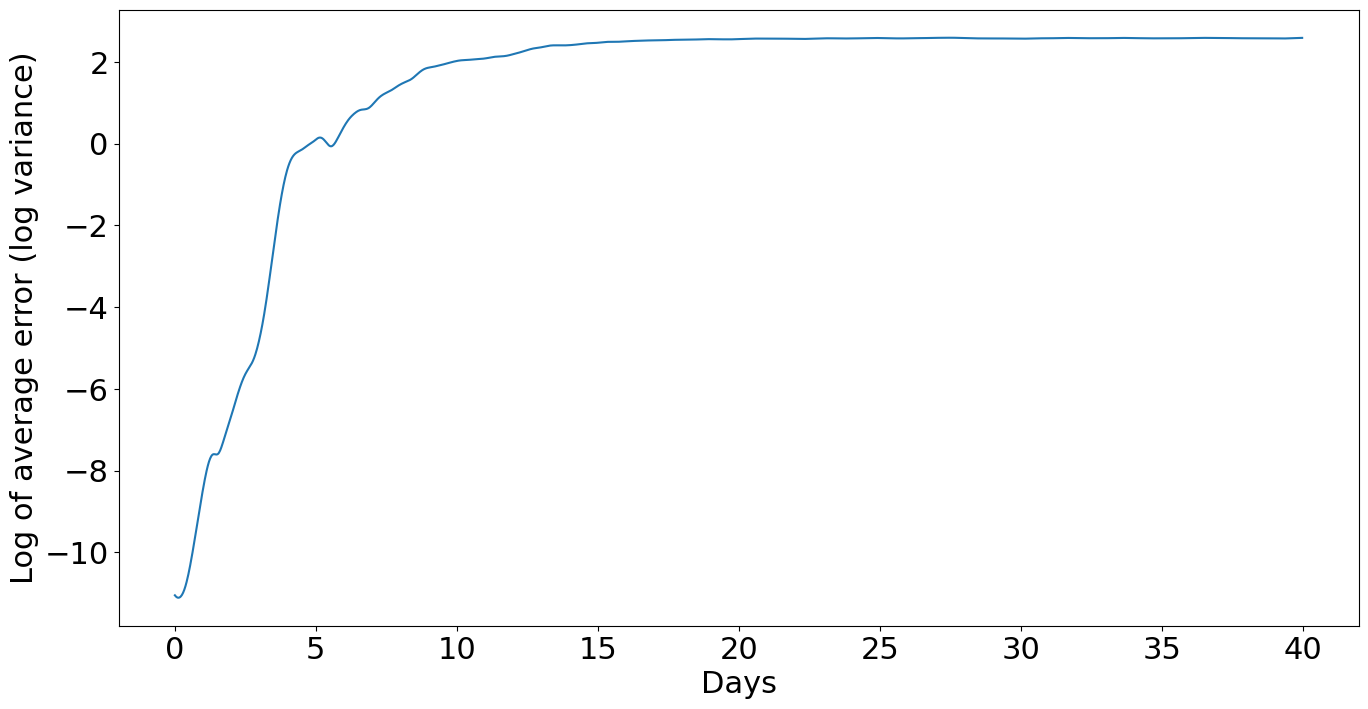

In [ ]:
meanvariance = np.mean(variancex,axis=0)

fig, ax = plt.subplots(1,1, figsize = (16,8))
ax.plot(timeindays,meanvariance)
ax.set_ylabel("Average error (variance)",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.show()
fig.savefig('Errorgrowth.png',bbox_inches='tight')

fig, ax = plt.subplots(1,1, figsize = (16,8))
ax.plot(timeindays,np.log(meanvariance))
ax.set_ylabel("Log of average error (log variance)",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.show()
fig.savefig('LogErrorgrowth.png',bbox_inches='tight')


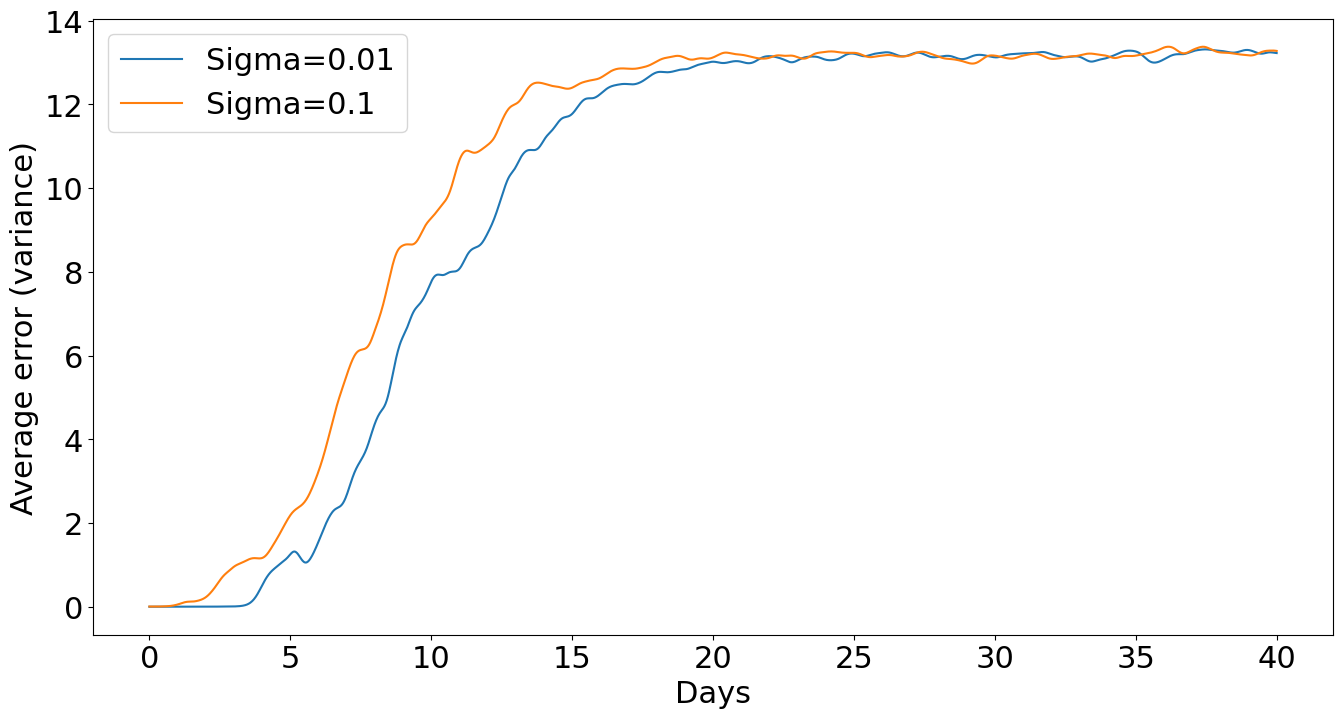

In [6]:
# loop through different sigma values and then graph it!

sigmas = [0.01,.1]

F = 8  # Forcing (leave as F = 8 for part C)

x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable
x0_init = odeint(L96, x0, t)

ensemble = 250 # number of ensemble members to generate


fig, ax = plt.subplots(1,1, figsize = (16,8))

for sg in sigmas:
    mu, sigma = 0, sg # mean and standard deviation (modify sigma for part C)
    s = np.random.normal(mu, sigma, ensemble)

    xj = np.zeros(shape=(ensemble,len(t),N))

    for j in range(ensemble):
        x0 = x0_init[1000,:] # New initial state (steady state from above after 1000 timesteps when saturation has been reached)
        x0[0] += s[j]  # Add small perturbation to the first longitude, draw from Gaussian error s
        x = odeint(L96, x0, t)
        xj[j,:]=x

    # calculate variances
    variancex = np.zeros(shape=(N,len(t)))
    for l in range(N):
        for k in range(len(t)):
            variancex[l,k] = np.var(xj[:,k,l])

    meanvariance = np.mean(variancex,axis=0)

    ax.plot(timeindays,meanvariance, label=f"Sigma={sg}")


ax.set_ylabel("Average error (variance)",fontsize=22)
ax.set_xlabel("Days",fontsize=22)
plt.legend()
plt.show()
fig.savefig('Errorgrowth.png',bbox_inches='tight')